In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
# Read dataset file
df = pd.read_csv('STB.csv')
df = df[['Price']]
df = df.dropna()
df

,Price
0,11750
1,12550
2,12900
3,13300
4,13000
...,...
1237,27000
1238,27400
1239,27000
1240,27200


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Normalize the data
mean = train_data.mean()
meant = test_data.mean()
meanv = val_data.mean()
std = train_data.std()
stdt = test_data.std()
stdv = val_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - meant) / stdt
val_data = (val_data - meanv) / stdv

In [5]:
# Prepare the data for CNN
window_size = 10

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data.values, window_size)
X_test, y_test = create_sequences(test_data.values, window_size)
X_val, y_val = create_sequences(val_data.values, window_size)


In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
23/23 [==============================] - 2s 19ms/step - loss: 0.2781 - val_loss: 0.2513
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.1395
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.1189
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.1109
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.0927
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0203 - val_loss: 0.0867
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.0954
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0165 - val_loss: 0.0777
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.0852
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0155 - val_loss: 0.0824
Epoch 11

23/23 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0717
Epoch 84/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.0746
Epoch 85/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.0731
Epoch 86/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.0737
Epoch 87/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0749
Epoch 88/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.0718
Epoch 89/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0727
Epoch 90/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0162 - val_loss: 0.0729
Epoch 91/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.0740
Epoch 92/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0709
Epoch 93/100


In [8]:
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions
y_pred = y_pred * pd.Series(stdt).values[0] + pd.Series(meant).values[0]

12/12 [==============================] - 0s 2ms/step


In [9]:
# Make predictions
y_vpred = model.predict(X_val)
# Inverse transform the predictions
y_vpred = y_vpred * pd.Series(stdv).values[0] + pd.Series(meanv).values[0]

4/4 [==============================] - 0s 4ms/step


In [10]:
df

,Price
0,11750
1,12550
2,12900
3,13300
4,13000
...,...
1237,27000
1238,27400
1239,27000
1240,27200


In [11]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# re make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
# re make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 3246.4811813544834
Testing RMSE: 6984.165795402376
Validation MAPE: 10.868866338532742
Testing MAPE: 22.75827587091843
Validation MAE: 2376.306625
Testing MAE: 5609.695324073945


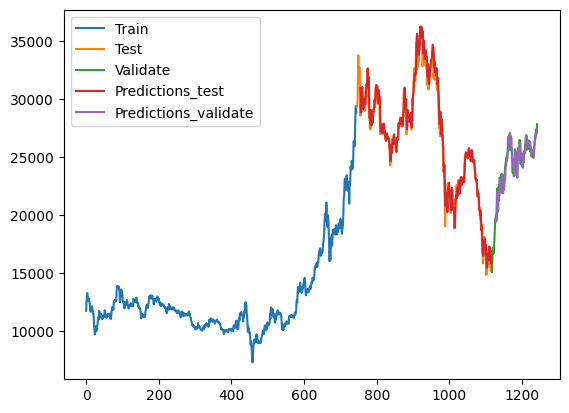

In [12]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index[-len(y_pred):], y_pred)
plt.plot(val_data.index[-len(y_vpred):], y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()

In [13]:
y_val

array([15100, 16150, 17200, 17100, 16700, 16900, 17500, 18200, 18900,
       19700, 19750, 20000, 19500, 20850, 22300, 20750, 20300, 21700,
       22400, 21300, 22550, 23250, 23250, 22800, 22400, 22450, 23550,
       23400, 23500, 21900, 22500, 22900, 22350, 22500, 23500, 23300,
       24200, 24300, 24650, 24950, 24700, 24950, 25300, 25500, 26550,
       26800, 26800, 26650, 25850, 27100, 25650, 26150, 26050, 25700,
       25750, 25000, 24450, 23650, 24500, 24400, 23350, 23900, 24400,
       25700, 25350, 24700, 25000, 24300, 23600, 23750, 25400, 25600,
       25000, 24900, 25000, 25350, 26500, 26000, 25000, 24400, 25350,
       24600, 25050, 24200, 24600, 24800, 25000, 25050, 25500, 25400,
       25350, 26000, 26200, 26750, 26900, 26250, 25650, 26000, 25950,
       25950, 26100, 26450, 25700, 25900, 25900, 25500, 25700, 25600,
       25550, 25050, 25400, 25150, 25300, 25150, 24950, 25650, 25750,
       26350, 26400, 26800, 27000, 27400, 27000, 27200, 27850],
      dtype=int64)

In [14]:
y_vpred

array([[19426.816],
       [19816.479],
       [19796.123],
       [19682.416],
       [20309.117],
       [22002.344],
       [21444.26 ],
       [20402.014],
       [21380.91 ],
       [21963.682],
       [21692.332],
       [22027.96 ],
       [23035.758],
       [22677.426],
       [22828.129],
       [22418.863],
       [21982.203],
       [23095.75 ],
       [23534.014],
       [23429.84 ],
       [21921.354],
       [21939.852],
       [22615.215],
       [22203.93 ],
       [22398.201],
       [23297.938],
       [23090.59 ],
       [23633.771],
       [24474.484],
       [24292.613],
       [24885.074],
       [24710.504],
       [24844.545],
       [25234.648],
       [25348.088],
       [26361.852],
       [26740.863],
       [26797.584],
       [26740.123],
       [26306.703],
       [26988.295],
       [26844.098],
       [26001.156],
       [26699.498],
       [25875.293],
       [25631.775],
       [25065.42 ],
       [24269.416],
       [24110.184],
       [24208.537],
